In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000796534"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000796534
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,NATIONAL BANKSHARES INC
Ticker,NKSH


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,35.0,1.421800e+01,1.101777e+01,0.0,0.0,18.25,23.71,27.86
interest income,52.0,1.268771e+07,4.667498e+06,9997000.0,10892250.0,11853500.00,12486000.00,34722000.00
net income,52.0,4.398404e+06,1.901131e+06,3140000.0,3640500.0,4032500.00,4404000.00,13168000.00
net interest income,52.0,1.032362e+07,4.275177e+06,7251000.0,9224250.0,9631000.00,10009000.00,30107000.00
provision for loan losses,52.0,4.737308e+05,3.732235e+05,-472000.0,201750.0,363000.00,686000.00,1329000.00


# Plots

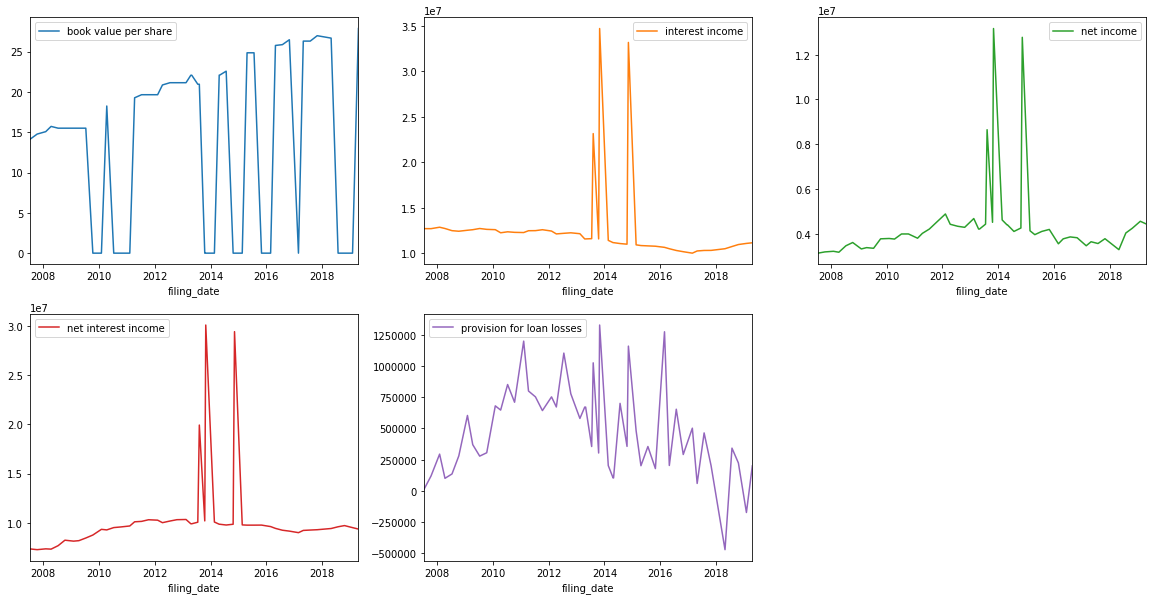

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                
0000796534 book value per share       2008Q3 to 2009Q2: 4 periods    missing   
           book value per share       2011Q3 to 2011Q4: 2 periods    missing   
           book value per share       2012Q3 to 2012Q4: 2 periods    missing   
           book value per share                            2013Q4    missing   
           book value per share                            2014Q4    missing   
           book value per share                            2017Q2    missing   
           book value per share                            2017Q4    missing   
           book value per share                            2018Q4    missing   
           interest income            2013Q2 to 2013Q3: 2 periods  duplicate   
           interest income                                 2014Q3  duplicate   
           interest income                                 2017Q4    missing   
           net income                 2013Q2 to 2013Q3: 2 periods  duplicate   
           net income                                      2014Q3  duplicate   
           net income                                      2017Q4    missing   
           net interest income        2013Q2 to 2013Q3: 2 periods  duplicate   
           net interest income                             2014Q3  duplicate   
           net interest income                             2017Q4    missing   
           provision for loan losses  2013Q2 to 2013Q3: 2 periods  duplicate   
           provision for loan losses                       2014Q3  duplicate   
           provision for loan losses                       2017Q4    missing   
           total revenue                                     None      empty   

                                                 message  
cik        item                                           
0000796534 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income              Duplicate period  
           interest income              Duplicate period  
           interest income                Missing period  
           net income                   Duplicate period  
           net income                   Duplicate period  
           net income                     Missing period  
           net interest income          Duplicate period  
           net interest income          Duplicate period  
           net interest income            Missing period  
           provision for loan losses    Duplicate period  
           provision for loan losses    Duplicate period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()